# Llama 3 8B Q4 M

## Temperature

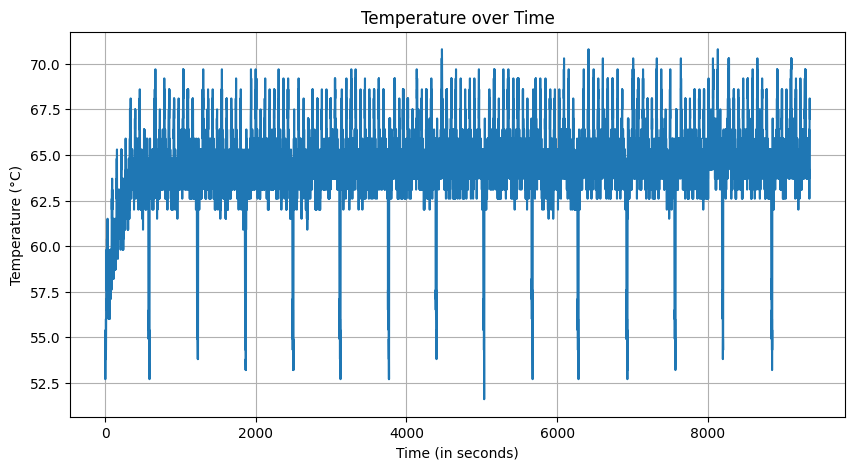

Mean Temperature: 64.46°C
Min Temperature: 51.60°C
Max Temperature: 70.80°C


In [2]:
import matplotlib.pyplot as plt
import datetime

# Open the file and read the lines
with open('temp.txt', 'r') as file:
    lines = file.readlines()

# Extract the temperature values and timestamps
timestamps = []
temperatures = []

for line in lines:
    parts = line.split(' - temp=')
    timestamp_str = parts[0]
    temp_str = parts[1].replace("'C", "")
    
    timestamp = datetime.datetime.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
    temperature = float(temp_str)
    
    timestamps.append(timestamp)
    temperatures.append(temperature)

# Create x-axis values starting at 0 with each line 0.5 units away
x_values = [i * 0.5 for i in range(len(temperatures))]

# Plot the temperatures
plt.figure(figsize=(10, 5))
plt.plot(x_values, temperatures)
plt.xlabel('Time (in seconds)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time')
plt.grid(True)
plt.show()

mean_temp = sum(temperatures) / len(temperatures)
min_temp = min(temperatures)
max_temp = max(temperatures)

print(f"Mean Temperature: {mean_temp:.2f}°C")
print(f"Min Temperature: {min_temp:.2f}°C")
print(f"Max Temperature: {max_temp:.2f}°C")

## Inference time

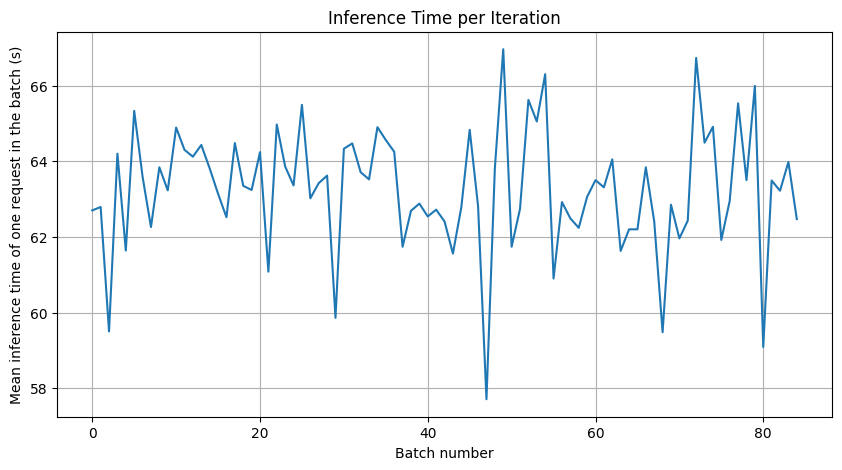

Mean Inference Time: 63.25s
Min Inference Time: 57.71s
Max Inference Time: 66.96s


In [3]:
import re

# Open the inference.txt file and read the lines
with open('inference.txt', 'r') as file:
    inference_lines = file.readlines()

# Extract the inference times using regular expressions
inference_times = []
for line in inference_lines:
    match = re.search(r'\[([\d:]+)<00:00, ([\d.]+)s/it\]', line)
    if match:
        time_str = match.group(2)
        inference_time = float(time_str)
        inference_times.append(inference_time)

# Create x-axis values for the inference times
x_inference_values = list(range(len(inference_times)))

# Plot the inference times
plt.figure(figsize=(10, 5))
plt.plot(x_inference_values, inference_times)
plt.xlabel('Batch number')
plt.ylabel('Mean inference time of one request in the batch (s)')
plt.title('Inference Time per Iteration')
plt.grid(True)
plt.show()
mean_inference_time = sum(inference_times) / len(inference_times)
min_inference_time = min(inference_times)
max_inference_time = max(inference_times)

print(f"Mean Inference Time: {mean_inference_time:.2f}s")
print(f"Min Inference Time: {min_inference_time:.2f}s")
print(f"Max Inference Time: {max_inference_time:.2f}s")

## CPU load

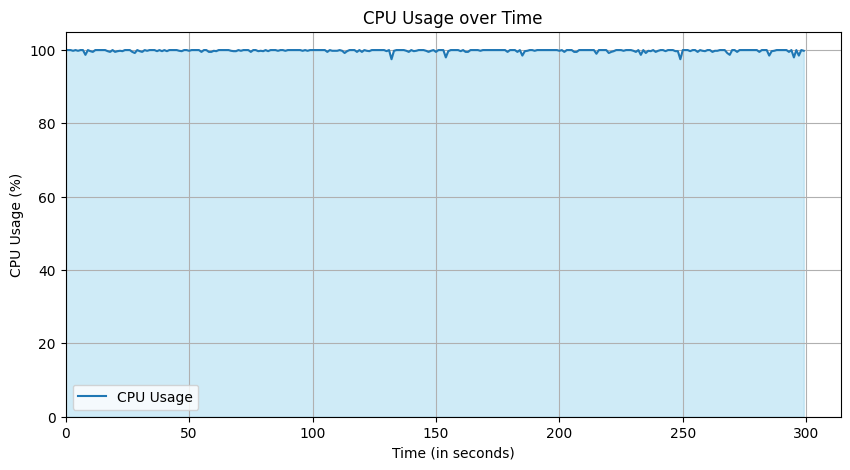

In [4]:
import json

# Open the cpu.json file and read the data
with open('cpu.json', 'r') as file:
    cpu_data = json.load(file)

# Extract the cpu_usage values
cpu_usage = [entry['cpu_usage'] for entry in cpu_data]

# Create x-axis values for the cpu usage
x_cpu_values = list(range(len(cpu_usage)))

# Plot the cpu usage
plt.figure(figsize=(10, 5))
plt.plot(x_cpu_values, cpu_usage, label='CPU Usage')
plt.fill_between(x_cpu_values, cpu_usage, color='skyblue', alpha=0.4)
plt.ylim(bottom=0)  # Set the y-axis to start at 0
plt.xlim(left=0)    # Set the x-axis to start at 0
plt.xlabel('Time (in seconds)')
plt.ylabel('CPU Usage (%)')
plt.title('CPU Usage over Time')
plt.grid(True)
plt.legend()
plt.show()

# Gsm8k

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

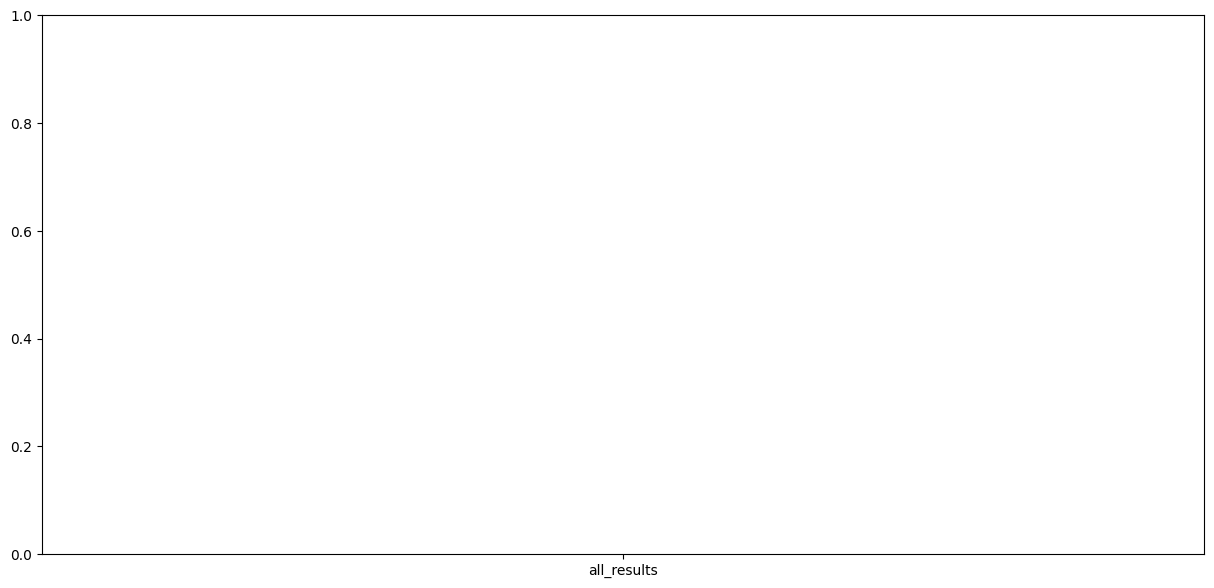

In [5]:
# Open and read the gsm8k/results.json file
with open('gsm8k/results.json', 'r') as file:
    results_data = json.load(file)

# Extract values from results_data, retrieval_data, and usage_data
results_values = [results_data[key] for key in results_data]

# Create x-axis labels
x_labels = list(results_data.keys())

# Combine all values into a single list
all_values = results_values

# Define colors for each group
colors = ['skyblue'] * len(results_values)

# Plot the values as a bar plot with different colors
plt.figure(figsize=(15, 7))
plt.bar(x_labels, all_values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Gsm8k Metrics Overview (Math tasks)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# MMLU

In [ ]:
# Open and read the gsm8k/results.json file
with open('mmlu/results.json', 'r') as file:
    results_data = json.load(file)

# Extract values from results_data, retrieval_data, and usage_data
results_values = [results_data[key] for key in results_data]

# Create x-axis labels
x_labels = list(results_data.keys())

# Combine all values into a single list
all_values = results_values

# Define colors for each group
colors = ['skyblue'] * len(results_values)

# Plot the values as a bar plot with different colors
plt.figure(figsize=(15, 7))
plt.bar(x_labels, all_values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('MMLU Metrics Overview (General tasks)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()